### Import Necessary Libraries

In [1]:
import pandas as pd
import os
from datetime import datetime

### Task #1: Merge the 12 months of sales data into a single CSV file.

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

In [3]:
all_data = pd.DataFrame()

In [4]:
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data,df])

In [5]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_data.to_csv('all_data.csv', index=False)

### Read data again - Update

In [7]:
all_data = pd.read_csv('all_data.csv')

### Clean Up the Data - Drop rows of NaN

In [8]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df
all_data = all_data.dropna(how = 'all')

In [9]:
all_data.loc[all_data['Order ID'] == 'Order ID'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data = all_data.loc[all_data['Order ID'] != 'Order ID'] # We removed the headers as we merged multiple data sets.
all_data.loc[all_data['Order ID'] == 'Order ID'] # There aren't anymore.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Parse order date

In [11]:
def year_updater(date):
    date = str(date)
    return datetime.strptime(date, '%m/%d/%y %H:%M')

In [12]:
all_data['Order Date'] = all_data['Order Date'].apply(year_updater)

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [14]:
all_data['year'] = all_data['Order Date'].dt.year
all_data['month'] = all_data['Order Date'].dt.month
all_data['day'] = all_data['Order Date'].dt.day
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
#Actually, these are not necessary, but I just wanted to show that it can be done this way. Additionally, it is important to reinforce how they are called.
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20,56
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16,0
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17,30


### Question 1: What was the best month for sales? How much was earned that month?



#### Add sales column

In [15]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minute,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,30,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,27,11.99


In [17]:
highest_sale_months = all_data.groupby('month').sum()['Sales'].sort_values(ascending = False)
highest_sale_months

C:\Users\GFB\AppData\Local\Temp\ipykernel_6796\3150491970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  highest_sale_months = all_data.groupby('month').sum()['Sales'].sort_values(ascending = False)


month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

In [18]:
print('The highest sales were {1}$ in the {0}th month.'.format(highest_sale_months.index[0] , highest_sale_months.iloc[0])) # Just for training

The highest sales were 4613443.34$ in the 12th month.


#### Visualize the question

C:\Users\GFB\AppData\Local\Temp\ipykernel_6796\2903071078.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('month').sum()


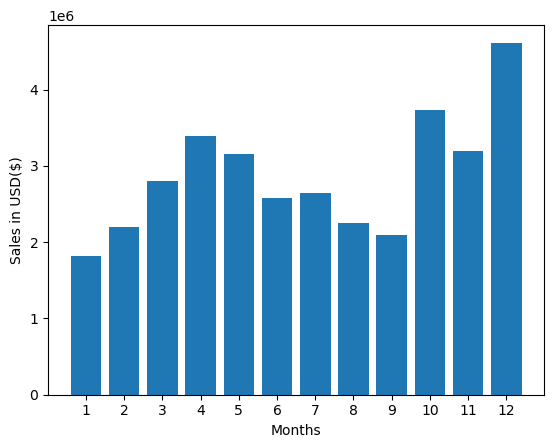

In [19]:
import matplotlib.pyplot as plt

result = all_data.groupby('month').sum()

months = [i for i in range(1,13)]

plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')

plt.show()

### Question 2: 


#### Which city has the most sales ?


In [20]:
all_data['City'] = None

In [21]:
def city_parser(address):
    city = address.split(sep = ',')[1].strip()
    return city

In [22]:
all_data['City'] = all_data['Purchase Address'].apply(city_parser)
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,hour,minute,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,46,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,30,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,38,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,27,11.99,Los Angeles


In [23]:
list(all_data['City'].unique()), len(list(all_data['City'].unique())) #The cities where sales were made and the number of cities

(['Dallas',
  'Boston',
  'Los Angeles',
  'San Francisco',
  'Seattle',
  'Atlanta',
  'New York City',
  'Portland',
  'Austin'],
 9)

In [24]:
cities_sales = all_data.groupby('City').Sales.sum().sort_values(ascending = False)
cities_sales

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

In [25]:
print('A sales of {0}$ was made in the city of {1}.'.format(cities_sales.iloc[0], cities_sales.index[0]))

A sales of 8262203.91$ was made in the city of San Francisco.


In [26]:
cities = all_data.groupby('City').Sales.sum()

C:\Users\GFB\AppData\Local\Temp\ipykernel_6796\2933421380.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('month').sum()


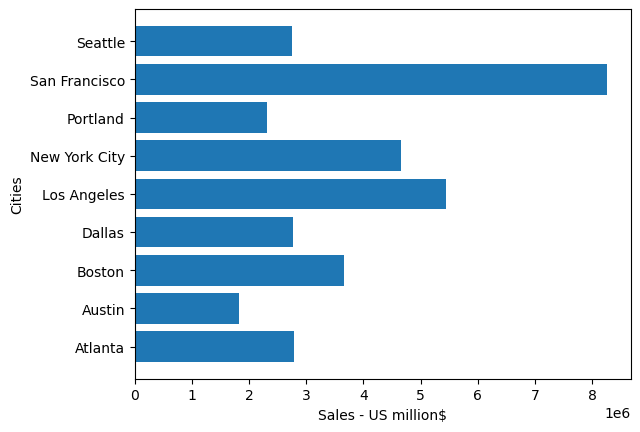

In [27]:
result = all_data.groupby('month').sum()

plt.barh(list(cities.index), cities)

plt.xlabel('Sales - US million$')
plt.ylabel('Cities')

plt.show() 

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [28]:
hours = all_data.hour.value_counts()
hours.head()

19    12905
12    12587
11    12411
18    12280
20    12228
Name: hour, dtype: int64

In [29]:
print('Publishing at {} will be the right decision.'.format(hours.index[0]))

Publishing at 19 will be the right decision.


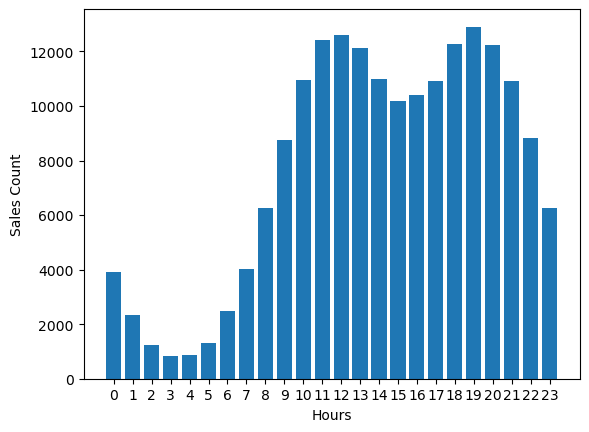

In [30]:
plt.bar(hours.index, hours)

plt.xticks(hours.index)
plt.ylabel('Sales Count')
plt.xlabel('Hours')

plt.show()

### Question 4: What products are most often sell together?

In [31]:
df = all_data.groupby('Order ID')['Product']
df.head(5)

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 185950, dtype: object

In [32]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\GFB\AppData\Local\Temp\ipykernel_6796\2833833587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
from itertools import combinations
from collections import Counter

In [34]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
    
count_data = {'Item Name': count.keys(), 'Count': count.values()}


dataframe_count = pd.DataFrame(data = count_data)
dataframe_count = dataframe_count.sort_values(ascending = False, by = 'Count')

In [35]:
dataframe_count = dataframe_count.reset_index(drop=True)
dataframe_count['Item Name'] = dataframe_count['Item Name'].astype(str).agg(lambda x:x.str.strip('()'))

In [36]:
dataframe_count

,Item Name,Count
0,"'iPhone', 'Lightning Charging Cable'",1005
1,"'Google Phone', 'USB-C Charging Cable'",987
2,"'iPhone', 'Wired Headphones'",447
3,"'Google Phone', 'Wired Headphones'",414
4,"'Vareebadd Phone', 'USB-C Charging Cable'",361
...,...,...
308,"'LG Washing Machine', 'iPhone'",1
309,"'LG Dryer', 'Wired Headphones'",1
310,"'27in FHD Monitor', 'Vareebadd Phone'",1
311,"'LG Washing Machine', '27in 4K Gaming Monitor'",1


### Question 5: Which product sold the most?

In [37]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

C:\Users\GFB\AppData\Local\Temp\ipykernel_6796\1447116882.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = products_group.sum()['Quantity Ordered']


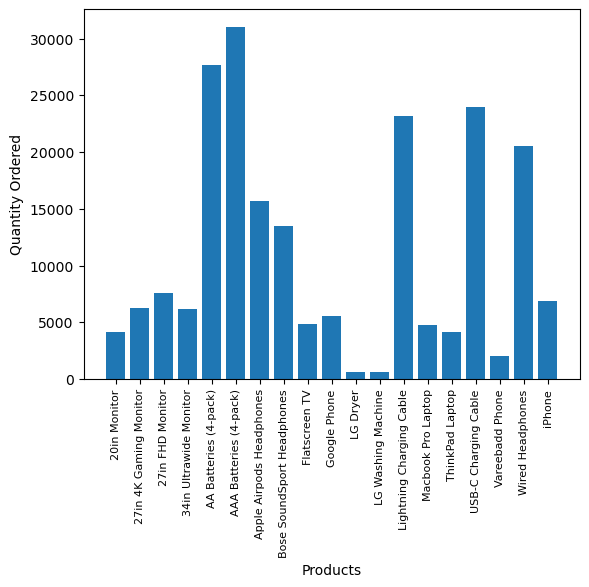

In [38]:
products_group = all_data.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']

products = [product for product, ds in products_group]


plt.bar(products, quantity_ordered)
plt.xticks(products, rotation= 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

plt.show()

#### Since we have data from a trading site, our simplest goal is to increase sales. In this study, we tried to answer a few questions in accordance with the data we have. But in my opinion, the most important question would be to find the point where site traffic is highest but sales are lowest. If we had the site flow data, it could be done in a way close to the applications made.